In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

dataset_id = "PXD027742" # Indicate Dataset Here

filepath = dataset_id + "/psm.TSV"

identifier = "434x Carrier"

psm_df = pd.read_csv(filepath, delimiter = "\t")
# prot_df = prot_df.drop(['Entry Name', 'Gene', 'Length', 'Organism', 'Protein Description', 'Protein Existence', 'Protein Probability', 'Top Peptide Probability',
#                        'Total Peptides', 'Unique Peptides', 'Razor Peptides', 'Total Spectral Count', 'Unique Spectral Count',
#                        'Razor Spectral Count', 'Total Intensity', 'Unique Intensity', 'Razor Intensity', 'Razor Assigned Modifications',
#                        'Razor Observed Modifications', 'Indistinguishable Proteins'], axis=1)

# psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
#                                'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
#                                'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.95]

psm_df = psm_df.loc[(psm_df["Spectrum File"] == "D:\\Users\\PCL_user\\Mass_Spec\\data\\TMT_sc_data\\Datasets\\PXD027742\\output\\interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_1.pep.xml")
                   | (psm_df["Spectrum File"] == "D:\\Users\\PCL_user\\Mass_Spec\\data\\TMT_sc_data\\Datasets\\PXD027742\\output\\interact-20200820_EXPL8_EVO1_ZY_SA_44min_TMT_H434_100pg_AGC300_2.pep.xml")]

print(psm_df.shape)

psm_df = pd.melt(psm_df, id_vars=['Peptide'], value_vars=["126","127C","127N","128C","128N","129C","129N","130C",
                                                          "130N","131C","131N","132C","132N","133C","133N","134N"])



# psm_df["value"] = psm_df["value"].apply(np.log10)
# psm_df["value"] = np.log10(psm_df["value"].replace(0, np.nan))

psm_df


(12983, 53)


,Peptide,variable,value
0,DRSEEER,126,226120.0625
1,THEEHHAAK,126,159593.0938
2,HSEAATAQR,126,234384.2344
3,THEEHHAAK,126,46764.6172
4,QHHPPYHQQHHQGPPPGGPGGR,126,75945.2188
...,...,...,...
207723,TQFLPPNLLALFAPR,134N,0.0000
207724,MTQIMFETFNVPAMYVAIQAVLSLYASGR,134N,0.0000
207725,AMGIMNSFVNDIFER,134N,956.0225
207726,ACPLDQAIGLLVAIFHK,134N,0.0000


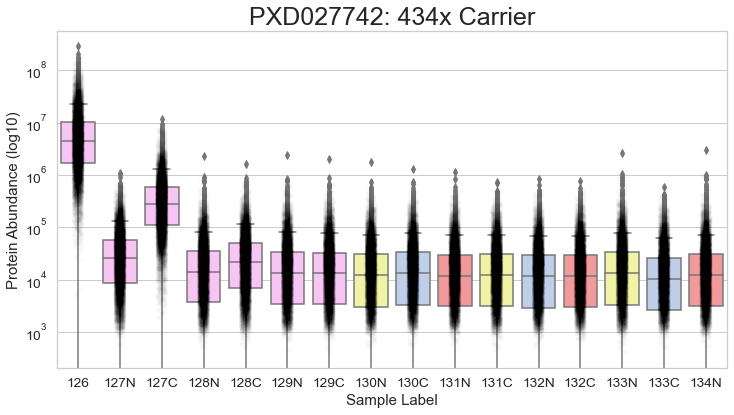

In [14]:
plt.figure(figsize=(12, 6.2025)) # Original: (16, 8.27)
# true_colors = ["#E1DCEE", "#9DE4AA", "#CADBF1", "#E8CBD9"]
# sns.set_palette(sns.color_palette(colors))
color_match = {"126": "#FFBDFC", "127N": "#FFBDFC", "127C": "#FFBDFC", "128N": "#FFBDFC",  "128C": "#FFBDFC",
               "129N": "#FFBDFC", "129C": "#FFBDFC", "130N": "#FCFF99", "130C": "#B8CDF0", "131N": "#FF8C8E",
               "131C": "#FCFF99", "132N": "#B8CDF0", "132C": "#FF8C8E", "133N": "#FCFF99", "133C": "#B8CDF0", "134N": "#FF8C8E",}


sns.set(font_scale=1.25)
sns.set_style("whitegrid")

boxplot = sns.boxplot(data=psm_df, x="variable", y="value", palette = color_match,
                      order=["126","127N","127C","128N","128C","129N","129C","130N",
                             "130C","131N","131C","132N","132C","133N","133C","134N"])

boxplot.set_title(dataset_id + ": " + identifier, fontsize=25)
boxplot = sns.stripplot(data=psm_df, x="variable", y="value", color='0', jitter=True, alpha=0.01, 
                     order=["126","127N","127C","128N","128C","129N","129C","130N",
                            "130C","131N","131C","132N","132C","133N","133C","134N"])

boxplot.set(xlabel="Sample Label", ylabel="Protein Abundance (log10)")

# plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3', 'legendEntry4', 'legendEntry5', '6', '7', '8'])
# sns.move_legend(boxplot, "center left")

plt.yscale('log')
plt.show()
# plt.savefig('proteinabundance.png', dpi=400)


In [ ]:
# Sample 1 = Boost (126)
# Sample 2 = 13C Spillover (127C)
# Sample 3 = Reference (127N)
# Sample 4 = Reference 15N Spillover
# Sample 5 = Double 13C Spillover?? (Just Blank)
# Sample 6 = Double 15N Spillover??? (Just Blank)
# Sample 7 = Blankiest Blank